 # <center> Digit Recognition using Naïve Bayes </center>

### Name : Bhushan Dive
### Roll no : 42
### Section : A 

***

## What is Handwritten Digit Recognition?

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

***

## Naïve Bayes Classifier Algorithm
- Naïve Bayes algorithm is a supervised learning algorithm, which is based on **Bayes theorem** and used for solving classification problems.
- Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

***

## Why is it called Naïve Bayes?
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

-   **Naïve**: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
- **Bayes**: It is called Bayes because it depends on the principle of Bayes Theorem.

***

## Bayes' Theorem:

- Bayes' theorem is also known as **Bayes' Rule** or **Bayes' law**, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
- The formula for Bayes' theorem is given as:

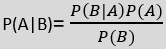

**Where,**
**P(A|B) is Posterior probability**: Probability of hypothesis A on the observed event B.

**P(B|A) is Likelihood probability**: Probability of the evidence given that the probability of a hypothesis is true.